## Data Balancing 

### Imports

In [1]:
import libs.config
from pandas import read_csv
from matplotlib.pyplot import figure, savefig, show
from libs.ds_charts import bar_chart

Since we have different scalling versions that lead to different training files we need to spit the balances into two balances: one takes minmax_train and other takes zscore_train. 

In [2]:
filename_minmax = 'data/dataset_2/air_quality_scaled_minmax_train.csv'
file_minmax = "air_quality_scaled_minmax_train"

filename_zscore = 'data/dataset_2/air_quality_scaled_zscore_train.csv'
file_zscore = "air_quality_scaled_zscore_train"

## For minmax

Minority class= Danger : 10737
Majority class= Safe : 91533
Proportion: 0.12 : 1


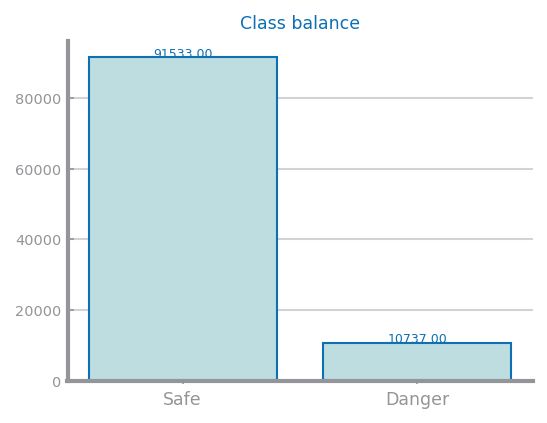

In [3]:
original = read_csv(filename_minmax, sep=',', decimal='.')
# drop this because later, knn does not handle not float values.
#original.drop(['date','FID'],axis=1,inplace=True)
class_var = 'ALARM'
target_count = original[class_var].value_counts()
positive_class = target_count.idxmin()
negative_class = target_count.idxmax()
#ind_positive_class = target_count.index.get_loc(positive_class)
print('Minority class=', positive_class, ':', target_count[positive_class])
print('Majority class=', negative_class, ':', target_count[negative_class])
print('Proportion:', round(target_count[positive_class] / target_count[negative_class], 2), ': 1')
values = {'Original': [target_count[positive_class], target_count[negative_class]]}

figure()
bar_chart(target_count.index, target_count.values, title='Class balance')
savefig(f'lab4_images/{file_minmax}_balance.png')
show()

As we can see the data is not balanced...

So we spilt the data into two datasets:one for each class. Then we can sample the required one and join the other, as we did on the other preparation techniques. In the end, we can write the dataset into a new datafile to explore later.

In [4]:
df_positives = original[original[class_var] == positive_class]
df_negatives = original[original[class_var] == negative_class]

Then we can use two strategies:
    - undersampling (for huge dataset and a considerable number fof positive records): keeps the positive records and samples the negative ones to balance the final distribution (negative side is that this loses data)
    - oversampling (small number of positive records): in order to create larger support the training step - this can be done with smote

In [5]:
from pandas import concat, DataFrame

df_neg_sample = DataFrame(df_negatives.sample(len(df_positives)))
df_under = concat([df_positives, df_neg_sample], axis=0)
df_under.to_csv(f'data/dataset_2/{file_minmax}_under.csv', index=False)
values['UnderSample'] = [len(df_positives), len(df_neg_sample)]
print('Minority class=', positive_class, ':', len(df_positives))
print('Majority class=', negative_class, ':', len(df_neg_sample))
print('Proportion:', round(len(df_positives) / len(df_neg_sample), 2), ': 1')
# here we split by the minory getting 97 of each

Minority class= Danger : 10737
Majority class= Safe : 10737
Proportion: 1.0 : 1


In [6]:
from pandas import concat, DataFrame

df_pos_sample = DataFrame(df_positives.sample(len(df_negatives), replace=True))
df_over = concat([df_pos_sample, df_negatives], axis=0)
df_over.to_csv(f'data/dataset_2/{file_minmax}_over.csv', index=False)
values['OverSample'] = [len(df_pos_sample), len(df_negatives)]
print('Minority class=', positive_class, ':', len(df_pos_sample))
print('Majority class=', negative_class, ':', len(df_negatives))
print('Proportion:', round(len(df_pos_sample) / len(df_negatives), 2), ': 1')

Minority class= Danger : 91533
Majority class= Safe : 91533
Proportion: 1.0 : 1


In [7]:
from pandas import concat, DataFrame

df_pos_sample = DataFrame(df_positives.sample(len(df_negatives), replace=True))
df_over = concat([df_pos_sample, df_negatives], axis=0)
df_over.to_csv(f'data/dataset_2/{file_minmax}_over.csv', index=False)
values['OverSample'] = [len(df_pos_sample), len(df_negatives)]
print('Minority class=', positive_class, ':', len(df_pos_sample))
print('Majority class=', negative_class, ':', len(df_negatives))
print('Proportion:', round(len(df_pos_sample) / len(df_negatives), 2), ': 1')

Minority class= Danger : 91533
Majority class= Safe : 91533
Proportion: 1.0 : 1


Now the smote method splits the original data into two: one with just one variable - the class variable, call it y, and another with all the other variables, call it X. Then the smote generates the positive records, don't needing to join the positive and negative ones. 
So, What we have to do is just rejoin the data (smote_x) with the corresponding class (smote_y), already updated.


In [8]:
from pandas import Series
from imblearn.over_sampling import SMOTE
RANDOM_STATE = 42

smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
y = original.pop(class_var).values
X = original.values
smote_X, smote_y = smote.fit_resample(X, y)
df_smote = concat([DataFrame(smote_X), DataFrame(smote_y)], axis=1)
df_smote.columns = list(original.columns) + [class_var]
df_smote.to_csv(f'data/dataset_2/{file_minmax}_smote.csv', index=False)

smote_target_count = Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count[positive_class], smote_target_count[negative_class]]
print('Minority class=', positive_class, ':', smote_target_count[positive_class])
print('Majority class=', negative_class, ':', smote_target_count[negative_class])
print('Proportion:', round(smote_target_count[positive_class] / smote_target_count[negative_class]))

Minority class= Danger : 91533
Majority class= Safe : 91533
Proportion: 1


Charts!

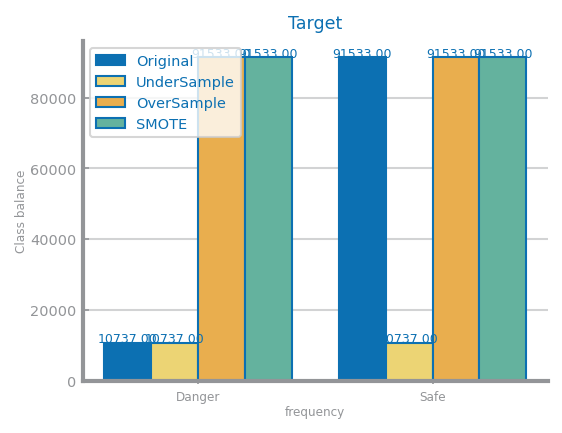

In [9]:
from matplotlib.pyplot import figure, show
from libs.ds_charts import multiple_bar_chart

figure()
multiple_bar_chart([positive_class, negative_class], values, title='Target', xlabel='frequency', ylabel='Class balance')
savefig(f'lab4_images/{file_minmax}_frequency.png')

show()

## For zscale
 

Minority class= Danger : 10737
Majority class= Safe : 91533
Proportion: 0.12 : 1


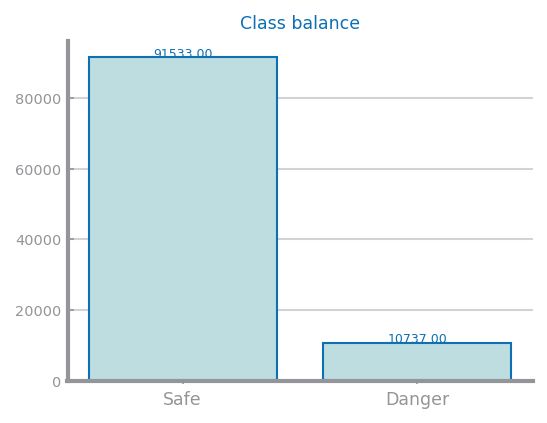

In [10]:
original = read_csv(filename_zscore, sep=',', decimal='.')
# drop this because later, knn does not handle not float values.
#original.drop(['date','FID'],axis=1,inplace=True)
class_var = 'ALARM'
target_count = original[class_var].value_counts()
positive_class = target_count.idxmin()
negative_class = target_count.idxmax()
#ind_positive_class = target_count.index.get_loc(positive_class)
print('Minority class=', positive_class, ':', target_count[positive_class])
print('Majority class=', negative_class, ':', target_count[negative_class])
print('Proportion:', round(target_count[positive_class] / target_count[negative_class], 2), ': 1')
values = {'Original': [target_count[positive_class], target_count[negative_class]]}

figure()
bar_chart(target_count.index, target_count.values, title='Class balance')
savefig(f'lab4_images/{file_zscore}_balance.png')
show()

In [11]:
df_positives = original[original[class_var] == positive_class]
df_negatives = original[original[class_var] == negative_class]

In [12]:
from pandas import concat, DataFrame

df_neg_sample = DataFrame(df_negatives.sample(len(df_positives)))
df_under = concat([df_positives, df_neg_sample], axis=0)
df_under.to_csv(f'data/dataset_2/{file_zscore}_under.csv', index=False)
values['UnderSample'] = [len(df_positives), len(df_neg_sample)]
print('Minority class=', positive_class, ':', len(df_positives))
print('Majority class=', negative_class, ':', len(df_neg_sample))
print('Proportion:', round(len(df_positives) / len(df_neg_sample), 2), ': 1')
# here we split by the minory getting 97 of each

Minority class= Danger : 10737
Majority class= Safe : 10737
Proportion: 1.0 : 1


In [13]:
from pandas import concat, DataFrame

df_pos_sample = DataFrame(df_positives.sample(len(df_negatives), replace=True))
df_over = concat([df_pos_sample, df_negatives], axis=0)
df_over.to_csv(f'data/dataset_2/{file_zscore}_over.csv', index=False)
values['OverSample'] = [len(df_pos_sample), len(df_negatives)]
print('Minority class=', positive_class, ':', len(df_pos_sample))
print('Majority class=', negative_class, ':', len(df_negatives))
print('Proportion:', round(len(df_pos_sample) / len(df_negatives), 2), ': 1')

Minority class= Danger : 91533
Majority class= Safe : 91533
Proportion: 1.0 : 1


In [14]:
from pandas import Series
from imblearn.over_sampling import SMOTE
RANDOM_STATE = 42

smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
y = original.pop(class_var).values
X = original.values
smote_X, smote_y = smote.fit_resample(X, y)
df_smote = concat([DataFrame(smote_X), DataFrame(smote_y)], axis=1)
df_smote.columns = list(original.columns) + [class_var]
df_smote.to_csv(f'data/dataset_2/{file_zscore}_smote.csv', index=False)

smote_target_count = Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count[positive_class], smote_target_count[negative_class]]
print('Minority class=', positive_class, ':', smote_target_count[positive_class])
print('Majority class=', negative_class, ':', smote_target_count[negative_class])
print('Proportion:', round(smote_target_count[positive_class] / smote_target_count[negative_class]))

Minority class= Danger : 91533
Majority class= Safe : 91533
Proportion: 1


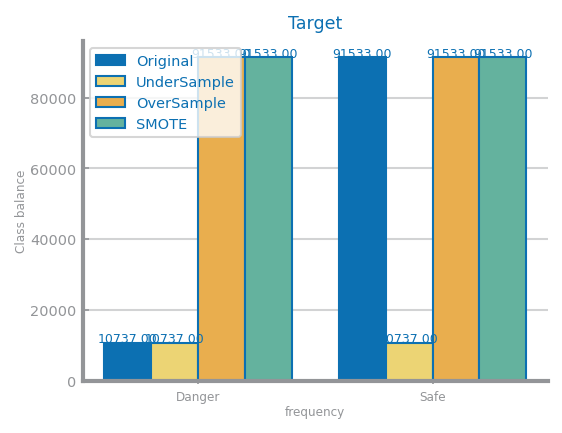

In [15]:
from matplotlib.pyplot import figure, show
from libs.ds_charts import multiple_bar_chart

figure()
multiple_bar_chart([positive_class, negative_class], values, title='Target', xlabel='frequency', ylabel='Class balance')
show()